In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# For splitting data, modeling, and metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [94]:
data_path = "Laptops.csv"

df = pd.read_csv(data_path)

df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laptop        2160 non-null   object 
 1   Status        2160 non-null   object 
 2   Brand         2160 non-null   object 
 3   Model         2160 non-null   object 
 4   CPU           2160 non-null   object 
 5   RAM           2160 non-null   int64  
 6   Storage       2160 non-null   int64  
 7   Storage type  2118 non-null   object 
 8   GPU           789 non-null    object 
 9   Screen        2156 non-null   float64
 10  Touch         2160 non-null   object 
 11  Final Price   2160 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 202.6+ KB


In [98]:
df.describe()

,RAM,Storage,Screen,Final Price
count,2160.000000,2160.000000,2156.000000,2160.000000
mean,15.413889,596.294444,15.168112,1312.638509
std,9.867815,361.220506,1.203329,911.475417
min,4.000000,0.000000,10.100000,201.050000
25%,8.000000,256.000000,14.000000,661.082500
50%,16.000000,512.000000,15.600000,1031.945000
75%,16.000000,1000.000000,15.600000,1708.970000
max,128.000000,4000.000000,18.000000,7150.470000


In [100]:
df.isnull().sum()

Laptop             0
Status             0
Brand              0
Model              0
CPU                0
RAM                0
Storage            0
Storage type      42
GPU             1371
Screen             4
Touch              0
Final Price        0
dtype: int64

In [102]:
numeric_cols = ['RAM', 'Final Price']  
corr_matrix = df[numeric_cols].corr()
corr_matrix

,RAM,Final Price
RAM,1.000000,0.724946
Final Price,0.724946,1.000000


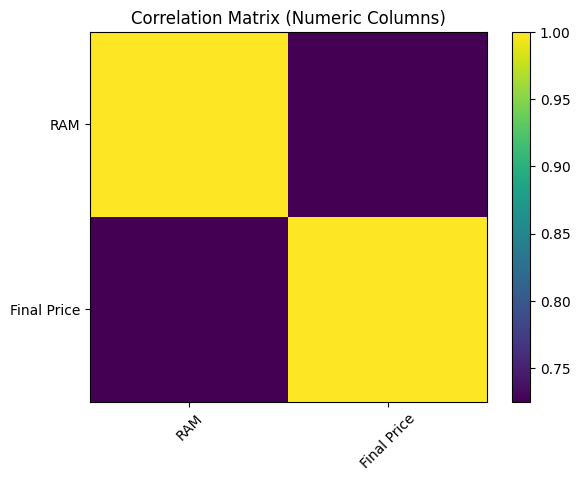

In [104]:
plt.imshow(corr_matrix, cmap='viridis', aspect='auto')
plt.colorbar()
plt.title("Correlation Matrix (Numeric Columns)")
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=45)
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.show()

In [106]:
df_exp1 = df.drop(['Laptop', 'Model'], axis=1)

In [108]:
df_exp1.dropna(inplace=True)


In [110]:
def extract_ram(ram_string):

    return int(''.join(filter(str.isdigit, str(ram_string))))

df_exp1['RAM'] = df_exp1['RAM'].apply(extract_ram)

In [112]:
def extract_storage(stor_string):

    s = str(stor_string).upper()
    if 'TB' in s:

        num_str = ''.join(filter(str.isdigit, s))
        if num_str == '':  
            return np.nan
        return float(num_str)*1024
    else:

        num_str = ''.join(filter(str.isdigit, s))
        if num_str == '':  
            return np.nan
        return float(num_str)

df_exp1['Storage'] = df_exp1['Storage'].apply(extract_storage)

In [116]:
df_exp1 = pd.get_dummies(df_exp1, columns=['Status', 'Brand', 'CPU', 'Storage type', 'GPU', 'Touch'], drop_first=True)


def extract_screen(screen_string):

    s = str(screen_string).lower().replace("inches", "").strip()
    try:
        return float(s)
    except:
        return np.nan

df_exp1['Screen'] = df_exp1['Screen'].apply(extract_screen)

In [118]:
df_exp1.dropna(inplace=True)

In [120]:
df_exp1.head()

,RAM,Storage,Screen,Final Price,Status_Refurbished,Brand_Apple,Brand_Asus,Brand_Deep Gaming,Brand_Dell,Brand_Gigabyte,...,GPU_Radeon Pro 5500M,GPU_Radeon Pro RX 560X,GPU_Radeon RX 6600M,GPU_T 1000,GPU_T 1200,GPU_T 2000,GPU_T 500,GPU_T 550,GPU_T 600,Touch_Yes
3,16,1000.0,15.6,1199.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,32,1000.0,17.3,1699.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,16,512.0,16.1,1149.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11,16,1000.0,15.6,1399.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12,16,512.0,15.6,1199.0,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [122]:
X_exp1 = df_exp1.drop('Final Price', axis=1)
y_exp1 = df_exp1['Final Price']


X_train_exp1, X_test_exp1, y_train_exp1, y_test_exp1 = train_test_split(
    X_exp1, y_exp1, test_size=0.2, random_state=42
)


In [124]:
lin_reg_exp1 = LinearRegression()
lin_reg_exp1.fit(X_train_exp1, y_train_exp1)


LinearRegression()

In [126]:
y_pred_exp1 = lin_reg_exp1.predict(X_test_exp1)
mse_exp1 = mean_squared_error(y_test_exp1, y_pred_exp1)
rmse_exp1 = np.sqrt(mse_exp1)
print("Experiment 1 - Linear Regression RMSE:", rmse_exp1)

Experiment 1 - Linear Regression RMSE: 509.7569505584798


In [130]:
df_exp2 = df.copy()

In [132]:
df_exp2.drop(['Laptop', 'Model'], axis=1, inplace=True)

In [134]:
df_exp2.dropna(inplace=True)


In [136]:
df_exp2['RAM'] = df_exp2['RAM'].apply(extract_ram)

In [138]:
df_exp2['Storage'] = df_exp2['Storage'].apply(extract_storage)

In [140]:
df_exp2['Screen'] = df_exp2['Screen'].apply(extract_screen)

In [142]:
def parse_cpu_details(cpu_str):
    # Example CPU string: "Intel Core i7 8th Gen"
    # We'll return a dict with brand, series, gen
    parts = cpu_str.split()
    if len(parts) < 3:
        return "Unknown", "Unknown", "Unknown"
    brand = parts[0]  # e.g. "Intel"
    series = parts[2] # e.g. "i7"
    # Generation might be in the 3rd or 4th part, let's look for "nth Gen"
    gen = "Unknown"
    for p in parts:
        if "gen" in p.lower():
            gen = p  # e.g. "8th" 
    return brand, series, gen

cpu_brands = []
cpu_series = []
cpu_gen = []

for c in df_exp2['CPU']:
    brand, series, gen = parse_cpu_details(str(c))
    cpu_brands.append(brand)
    cpu_series.append(series)
    cpu_gen.append(gen)

df_exp2['CPU_Brand'] = cpu_brands
df_exp2['CPU_Series'] = cpu_series
df_exp2['CPU_Gen'] = cpu_gen

# We can then drop the old 'CPU' column
df_exp2.drop('CPU', axis=1, inplace=True)

In [146]:
cat_cols_exp2 = ['Status', 'Brand', 'Storage type', 'GPU', 'Touch', 
                 'CPU_Brand', 'CPU_Series', 'CPU_Gen']
df_exp2 = pd.get_dummies(df_exp2, columns=cat_cols_exp2, drop_first=True)

In [148]:
df_exp2.dropna(inplace=True)

In [150]:
X_exp2 = df_exp2.drop('Final Price', axis=1)
y_exp2 = df_exp2['Final Price']

In [152]:
X_train_exp2, X_test_exp2, y_train_exp2, y_test_exp2 = train_test_split(
    X_exp2, y_exp2, test_size=0.2, random_state=42
)


In [154]:
lin_reg_exp2 = LinearRegression()
lin_reg_exp2.fit(X_train_exp2, y_train_exp2)

y_pred_exp2 = lin_reg_exp2.predict(X_test_exp2)
mse_exp2 = mean_squared_error(y_test_exp2, y_pred_exp2)
rmse_exp2 = np.sqrt(mse_exp2)
print("Experiment 2 - Linear Regression RMSE:", rmse_exp2)

Experiment 2 - Linear Regression RMSE: 505.31566792954646


In [156]:
X_train_exp3, X_test_exp3, y_train_exp3, y_test_exp3 = train_test_split(
    X_exp2, y_exp2, test_size=0.2, random_state=42
)

In [158]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_exp3, y_train_exp3)


RandomForestRegressor(random_state=42)

In [160]:
y_pred_exp3 = rf_reg.predict(X_test_exp3)
mse_exp3 = mean_squared_error(y_test_exp3, y_pred_exp3)
rmse_exp3 = np.sqrt(mse_exp3)
print("Experiment 3 - Random Forest RMSE:", rmse_exp3)

Experiment 3 - Random Forest RMSE: 585.0378891033433


In [162]:
print("Experiment 1 - Linear Regression RMSE:", rmse_exp1)
print("Experiment 2 - Linear Regression RMSE:", rmse_exp2)
print("Experiment 3 - Random Forest RMSE:", rmse_exp3)

Experiment 1 - Linear Regression RMSE: 509.7569505584798
Experiment 2 - Linear Regression RMSE: 505.31566792954646
Experiment 3 - Random Forest RMSE: 585.0378891033433
